# Lab 10

In [1]:
# Importing Libraries
import networkx as nkx
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [2]:
Graph = nkx.Graph()

Graph.add_nodes_from( [ "Arad", "Bucharest", "Oradea", "Zerind", "Sibiu", "Timisoara", "Lugoj", "Mahadia", "Dobreta", "Rimnicu Vilcea", "Craiova", "Pitesti", "Fagaras", "Giurgiu", "Urziceni", "Hirsova", "Eforie", "Vaslui", "Iasi", "Neamt"])

In [3]:
edges = [ ( "Arad", "Zerind", 75), ( "Arad", "Sibiu", 140), ( "Arad", "Timisoara", 118), ( "Bucharest", "Fagaras", 211), ( "Bucharest", "Urziceni",85), ( "Bucharest", "Giurgiu",90), ( "Bucharest", "Pitesti",101), ( "Craiova", "Dobreta",120), ( "Craiova", "Pitesti",138), ( "Craiova","Rimnicu Vilcea", 146), ( "Dobreta", "Mehadia", 75), ( "Eforie", "Hirsova", 86), ( "Fagaras", "Sibiu", 99), ("Fagaras", "Bucharest", 211), ( "Hirsova", "Urziceni", 98), ( "Iasi", "Neamt", 87), ( "Iasi", "Vaslui", 92), ( "Lugoj", "Mehadia", 70), ( "Lugoj", "Timisoara",111), ( "Oradea", "Zerind", 71), ( "Oradea", "Sibiu", 151), ( "Pitesti", "Rimnicu Vilcea", 97), ( "Rimnicu Vilcea", "Sibiu",80), ( "Urziceni", "Vaslui",142)] #add remaining edges to the list

for edge in edges:
    Graph.add_edge( edge[0], edge[1], weight=edge[2])

In [4]:
edges

[('Arad', 'Zerind', 75),
 ('Arad', 'Sibiu', 140),
 ('Arad', 'Timisoara', 118),
 ('Bucharest', 'Fagaras', 211),
 ('Bucharest', 'Urziceni', 85),
 ('Bucharest', 'Giurgiu', 90),
 ('Bucharest', 'Pitesti', 101),
 ('Craiova', 'Dobreta', 120),
 ('Craiova', 'Pitesti', 138),
 ('Craiova', 'Rimnicu Vilcea', 146),
 ('Dobreta', 'Mehadia', 75),
 ('Eforie', 'Hirsova', 86),
 ('Fagaras', 'Sibiu', 99),
 ('Fagaras', 'Bucharest', 211),
 ('Hirsova', 'Urziceni', 98),
 ('Iasi', 'Neamt', 87),
 ('Iasi', 'Vaslui', 92),
 ('Lugoj', 'Mehadia', 70),
 ('Lugoj', 'Timisoara', 111),
 ('Oradea', 'Zerind', 71),
 ('Oradea', 'Sibiu', 151),
 ('Pitesti', 'Rimnicu Vilcea', 97),
 ('Rimnicu Vilcea', 'Sibiu', 80),
 ('Urziceni', 'Vaslui', 142)]

In [5]:
# Set node positions using Kamada-Kawai layout
position = nkx.kamada_kawai_layout(Graph)


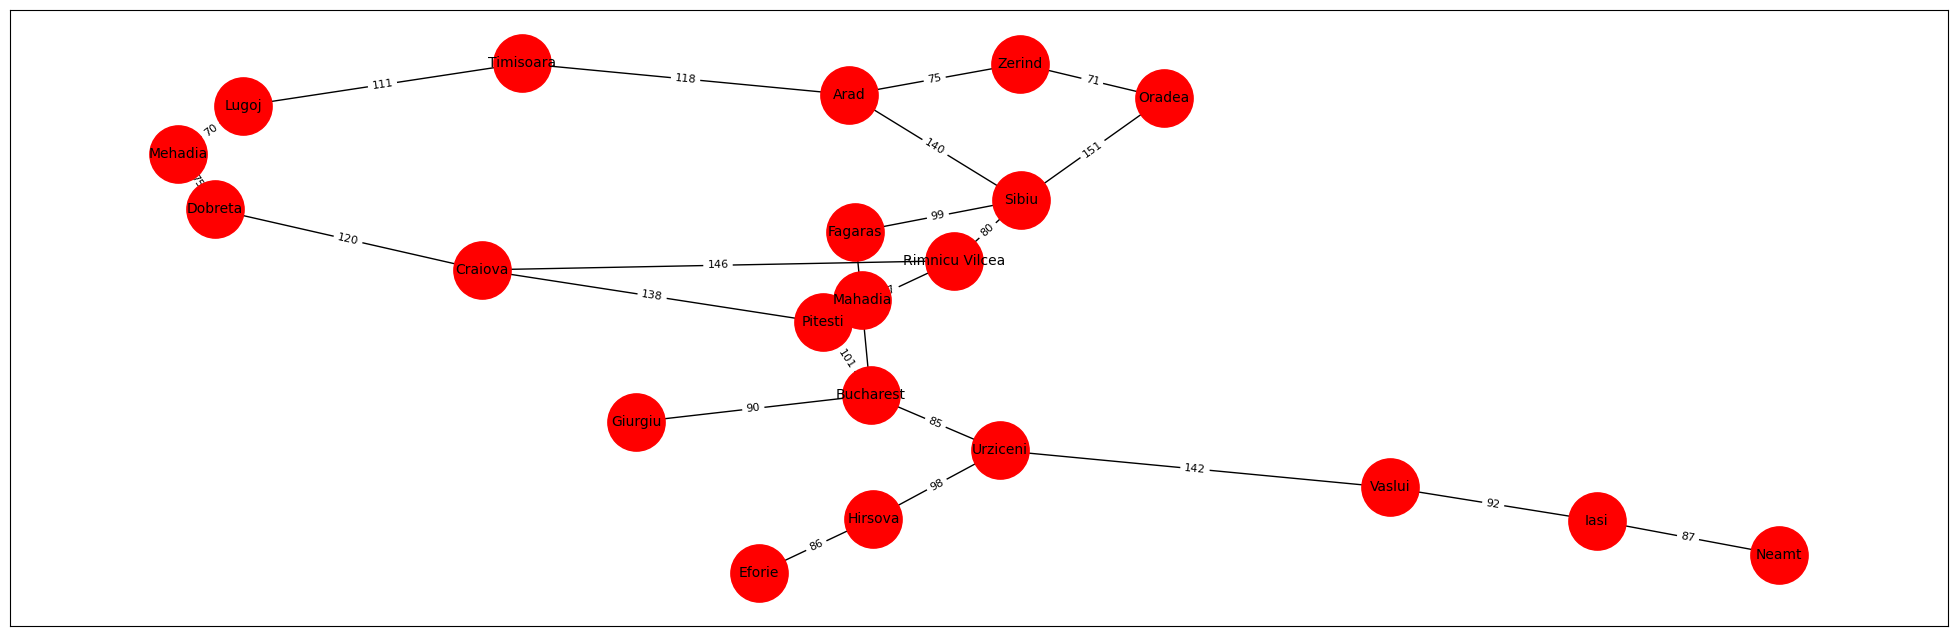

In [6]:
# Draw graph with labels and edge weights
plt.figure(figsize=(25, 8))
nkx.draw_networkx(Graph, position, with_labels=True, font_size=10, node_size= 1700, node_color ="red")

edge_labels = nkx.get_edge_attributes(Graph, "weight")
nkx.draw_networkx_edge_labels(Graph, position, edge_labels=edge_labels, font_size=8)

plt.show()

In [7]:
# Define the heuristic function for best-first search algorithm
Heuristic = {
    'Arad': 366,
    'Bucharest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 176,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugoj': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 100,
    'Rimnicu Vilcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}

In [8]:
Heuristic

{'Arad': 366,
 'Bucharest': 0,
 'Craiova': 160,
 'Drobeta': 242,
 'Eforie': 161,
 'Fagaras': 176,
 'Giurgiu': 77,
 'Hirsova': 151,
 'Iasi': 226,
 'Lugoj': 244,
 'Mehadia': 241,
 'Neamt': 234,
 'Oradea': 380,
 'Pitesti': 100,
 'Rimnicu Vilcea': 193,
 'Sibiu': 253,
 'Timisoara': 329,
 'Urziceni': 80,
 'Vaslui': 199,
 'Zerind': 374}

In [9]:
def main_function():
    que = PriorityQueue()

    start = "Arad"
    goal = "Bucharest"
    

    visit = []
    close = []

    que.put((Heuristic[start],start))

    while que.empty() == False:
    
        que = PriorityQueue()

        start = "Arad"
        goal = "Bucharest"

    visit = []
    close = []

    que.put((Heuristic[start],start))

    while que.empty() == False:
    
        n = que.get()
    
        h = n[0]
        city = n[1]
        
        visit.append(city)
        close.append(city)
        
    
        successors = [i for i in Graph.neighbors(city)]
    
        if goal in successors:
        
            visit.append(goal)
            cost = nkx.path_weight(Graph, visit, "weight")
            print("============================")

            print("Goal city:", goal, "reached.")
            print("============================")

            print("Visited cities:", visit)
            print("==========================================================")

            print("Cost = ", cost)
            break
        
        successor_queue = PriorityQueue()
    
        for i in successors:
            successor_queue.put((Heuristic[i], i))
    
        for i in successors:
            s = successor_queue.get()
            if s not in close and s not in visit:
                que.put(s)
                break
    print("\n===================")
    print("Search is Completed")
    print("===================")

In [10]:
main_function()

Goal city: Bucharest reached.
Visited cities: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Cost =  450

Search is Completed


 # BY USER CHOICE

In [12]:
def main_function():
    que = PriorityQueue()

    
    """
    start = "Arad"
    goal = "Bucharest"
    """
    start = input("Enter the Starting position ==> ")
    goal = input("Enter the Goal position ==> ")

    visit = []
    close = []

    que.put((Heuristic[start],start))

    while que.empty() == False:
    
        que = PriorityQueue()

        """
        start = "Arad"
        goal = "Bucharest"
        """
    start = input("Enter the Starting position ==> ")
    goal = input("Enter the Goal position ==> ")

    visit = []
    close = []

    que.put((Heuristic[start],start))

    while que.empty() == False:
    
        n = que.get()
    
        h = n[0]
        city = n[1]
        
        visit.append(city)
        close.append(city)
        
    
        successors = [i for i in Graph.neighbors(city)]
    
        if goal in successors:
        
            visit.append(goal)
            cost = nkx.path_weight(Graph, visit, "weight")
            print("============================")

            print("Goal city:", goal, "reached.")
            print("============================")

            print("Visited cities:", visit)
            print("==========================================================")

            print("Cost = ", cost)
            break
        
        successor_queue = PriorityQueue()
    
        for i in successors:
            successor_queue.put((Heuristic[i], i))
    
        for i in successors:
            s = successor_queue.get()
            if s not in close and s not in visit:
                que.put(s)
                break
    print("\n===================")
    print("Search is Completed")
    print("===================")

In [13]:
"""
        start = "Arad"
        goal = "Bucharest"
        
"""
main_function()

Enter the Starting position ==> Arad
Enter the Goal position ==> Bucharest
Enter the Starting position ==> Arad
Enter the Goal position ==> Bucharest
Goal city: Bucharest reached.
Visited cities: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Cost =  450

Search is Completed
